In [0]:
import nltk
from nltk.util import ngrams
from nltk.corpus import alpino
unigrams = ngrams(alpino.words(), 1)

In [32]:
import collections
word_count = collections.Counter(unigrams)
word_count_sort = word_count.most_common(10)
word_count_sort

[(('de',), 7688),
 (('.',), 6503),
 ((',',), 5385),
 (('van',), 4372),
 (('het',), 3249),
 (('een',), 3033),
 (('in',), 2783),
 (('en',), 2438),
 (('&quot;',), 1786),
 (('te',), 1432)]

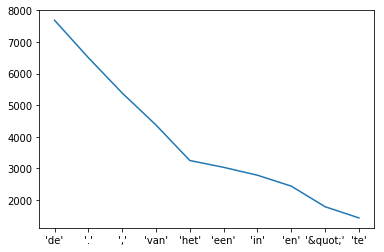

In [33]:
import matplotlib.pyplot as plt
d = {v[0]:v[1] for v in word_count_sort}
x = [str(v)[1:-2] for v in d.keys()]
plt.plot(x, d.values())
plt.show()

In [34]:
from nltk.util import bigrams
douigrams = bigrams(alpino.words())
word_count = collections.Counter(douigrams)
word_count_sort = word_count.most_common(10)
word_count_sort

[(('van', 'de'), 1426),
 (('.', 'De'), 1128),
 (('in', 'de'), 671),
 ((',', 'die'), 526),
 (('van', 'het'), 484),
 (('.', 'Het'), 479),
 (('.', '&quot;'), 451),
 ((',', 'dat'), 443),
 (('in', 'het'), 373),
 (('op', 'de'), 338)]

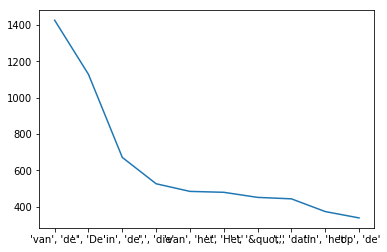

In [35]:
d = {v[0]:v[1] for v in word_count_sort}
x = [str(v)[1:-1] for v in d.keys()]
plt.plot(x, d.values())
plt.show()

In [36]:
import jieba
 
# 全模式
text = "我来到北京清华大学"
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))
 
# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))
 
# 默认是精确模式
seg_list = jieba.cut(text)
print(u"[默认模式]: ", "/ ".join(seg_list))
 
# 搜索引擎模式
seg_list = jieba.cut_for_search(text)
print(u"[搜索引擎模式]: ", "/ ".join(seg_list))

[全模式]:  我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
[精确模式]:  我/ 来到/ 北京/ 清华大学
[默认模式]:  我/ 来到/ 北京/ 清华大学
[搜索引擎模式]:  我/ 来到/ 北京/ 清华/ 华大/ 大学/ 清华大学


In [37]:
import jieba
 
#新词识别  “杭研”并没有在词典中,但是也被Viterbi算法识别出来了
seg_list = jieba.cut("他来到了网易杭研大厦")
print (u"[新词识别]: ", "/ ".join(seg_list))

[新词识别]:  他/ 来到/ 了/ 网易/ 杭研/ 大厦


In [38]:
import jieba
 
text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"
 
# 全模式
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))
 
# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))
 
# 搜索引擎模式
seg_list = jieba.cut_for_search(text)
print(u"[搜索引擎模式]: ", "/ ".join(seg_list))


[全模式]:  故宫/ 的/ 著名/ 著名景点/ 景点/ 包括/ 乾/ 清宫/ / / 太和/ 太和殿/ 和/ 黄/ 琉璃/ 琉璃瓦/ 等
[精确模式]:  故宫/ 的/ 著名景点/ 包括/ 乾/ 清宫/ 、/ 太和殿/ 和/ 黄/ 琉璃瓦/ 等
[搜索引擎模式]:  故宫/ 的/ 著名/ 景点/ 著名景点/ 包括/ 乾/ 清宫/ 、/ 太和/ 太和殿/ 和/ 黄/ 琉璃/ 琉璃瓦/ 等


In [39]:
import jieba
import jieba.analyse
tags = jieba.analyse.extract_tags(text, topK=5)
print (u"关键词:")
print (" ".join(tags))

关键词:
著名景点 太和殿 琉璃瓦 故宫 清宫


In [40]:

import jieba
 
 
# 去除停用词
stopwords = {}.fromkeys(['的', '包括', '等', '是'])
text = "故宫的著名景点包括乾清宫、太和殿和午门等。其中乾清宫非常精美，午门是紫禁城的正门。"
# 精确模式
segs = jieba.cut(text, cut_all=False)
final = ''
for seg in segs:
    if seg not in stopwords:
            final += seg
print (final)
 
seg_list = jieba.cut(final, cut_all=False)



故宫著名景点乾清宫、太和殿和午门。其中乾清宫非常精美，午门紫禁城正门。


In [0]:
def build_vocab(train_dir, vocab_dir, vocab_size=5000):
    """根据训练集构建词汇表，存储"""
    data_train, _ = read_file(train_dir)
 
    all_data = []
    for content in data_train:
        all_data.extend(content)
 
    counter = Counter(all_data)
    count_pairs = counter.most_common(vocab_size - 1)
    words, _ = list(zip(*count_pairs))
    # 添加一个 <PAD> 来将所有文本pad为同一长度
    words = ['<PAD>'] + list(words)
    open_file(vocab_dir, mode='w').write('\n'.join(words) + '\n')

In [42]:
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
 
 
# 读取停用词
def read_stopword(filename):
    stopword = []
    fp = open(filename, 'r')
    for line in fp.readlines():
        stopword.append(line.replace('\n', ''))
    fp.close()
    return stopword
 
 
# 切分数据，并删除停用词
def cut_data(data, stopword):
    words = []
    for content in data['content']:
        word = list(jieba.cut(content))
        for w in list(set(word) & set(stopword)):
            while w in word:
                word.remove(w)
        words.append(' '.join(word))
    data['content'] = words
    return data
 
 
# 获取单词列表
def word_list(data):
    all_word = []
    for word in data['content']:
        all_word.extend(word)
    all_word = list(set(all_word))
    return all_word
 
 
# 计算文本向量
def text_vec(data):
    count_vec = CountVectorizer(max_features=300, min_df=2)
    count_vec.fit_transform(data['content'])
    fea_vec = count_vec.transform(data['content']).toarray()
    return fea_vec
 
 
if __name__ == '__main__':
    data = pd.read_csv('./cnews/test.txt', names=['title', 'content'], sep='\t')  # (10000, 2)
 
    stopword = read_stopword('./cnews/stopword.txt')
    data = cut_data(data, stopword)
 
    fea_vec = text_vec(data)
    print(fea_vec)

FileNotFoundError: ignored

In [0]:
# coding: utf-8
import jieba
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
 
 
# 读取停用词
def read_stopword(filename):
    stopword = []
    fp = open(filename, 'r', encoding="unicode_escape")
    for line in fp.readlines():
        stopword.append(line.replace('\n', ''))
    fp.close()
    return stopword
 
 
# 切分数据，并删除停用词
def cut_data(data, stopword):
    words = []
    for content in data['content']:
        word = list(jieba.cut(content))
        for w in list(set(word) & set(stopword)):
            while w in word:
                word.remove(w)
        words.append(' '.join(word))
    data['content'] = words
    return data
 
 
# 获取单词列表
def word_list(data):
    all_word = []
    for word in data['content']:
        all_word.extend(word)
    all_word = list(set(all_word))
    return all_word
 
 
# 计算文本向量
def text_vec(data):
    count_vec = CountVectorizer(max_features=300, min_df=2)
    count_vec.fit_transform(data['content'])
    fea_vec = count_vec.transform(data['content']).toarray()
    return fea_vec
 
 
if __name__ == '__main__':
    data = pd.read_csv('../text.txt', names=['title', 'content'], sep='\t', encoding="unicode_escape")  # (10000, 2)
 
    stopword = read_stopword('../stopword.txt')
    data = cut_data(data, stopword)
 
    fea_vec = text_vec(data)
    print(fea_vec)

In [61]:
stopword

['µÄ °üÀ¨ µÈ ÊÇ']